In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

from extraction_tools import NIRSpecExtraction

path = '/net/schenk/data2/regt/JWST_reductions/NIRSpec_ifu_reduction_23_09_2025/VHS1256b/data/'

/net/schenk/data2/regt/JWST_reductions/jwst_nirspec_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/extraction_tools.py:167: RuntimeWarning: All-NaN slice encountered
  horizontal_collapsed = np.nanmedian(masked_cube, axis=2, keepdims=True)


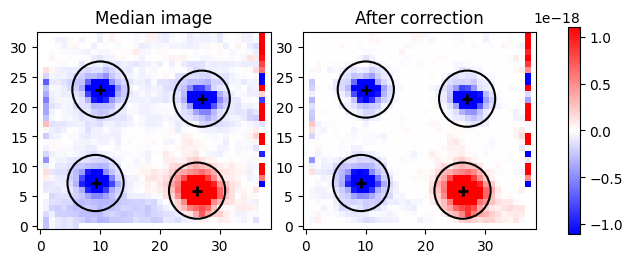

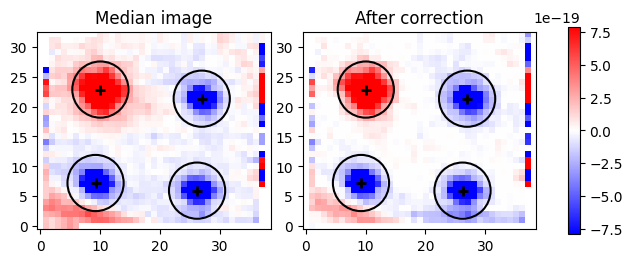

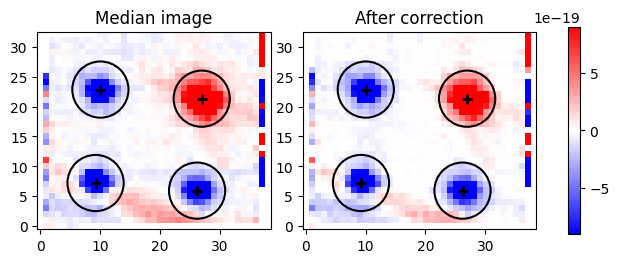

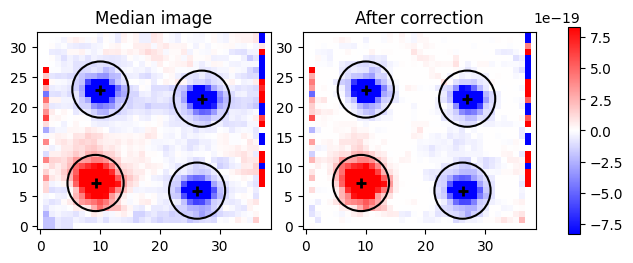

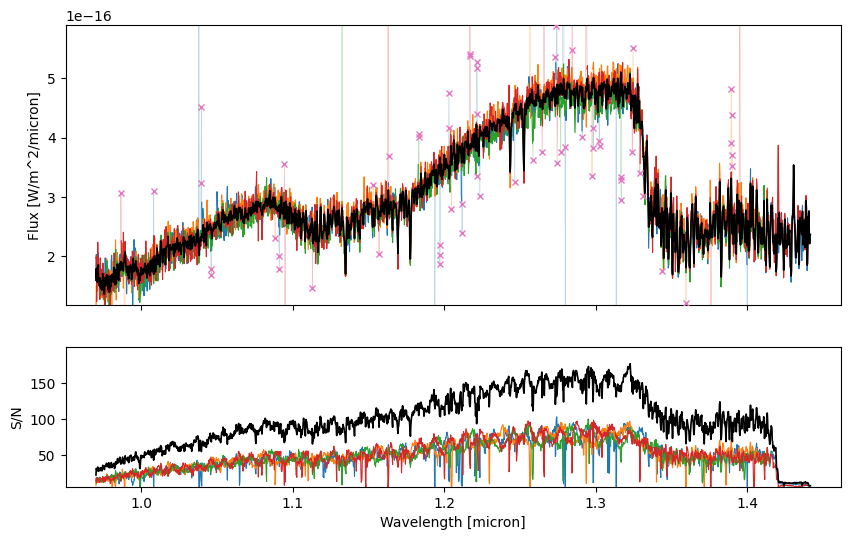

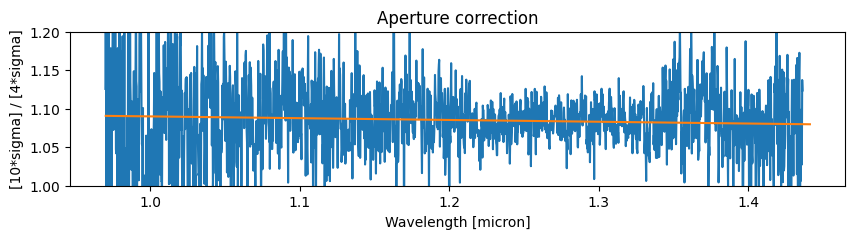

/net/schenk/data2/regt/JWST_reductions/NIRSpec_ifu_reduction_23_09_2025/VHS1256b/data//nirspec_140h_1.dat


/net/schenk/data2/regt/JWST_reductions/jwst_nirspec_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/extraction_tools.py:167: RuntimeWarning: All-NaN slice encountered
  horizontal_collapsed = np.nanmedian(masked_cube, axis=2, keepdims=True)


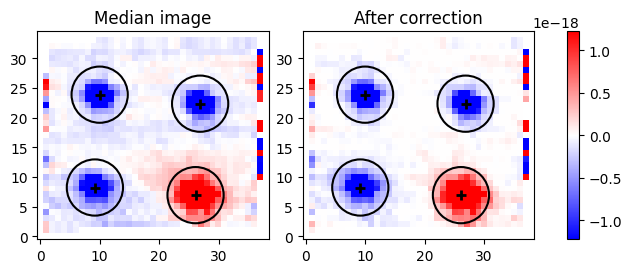

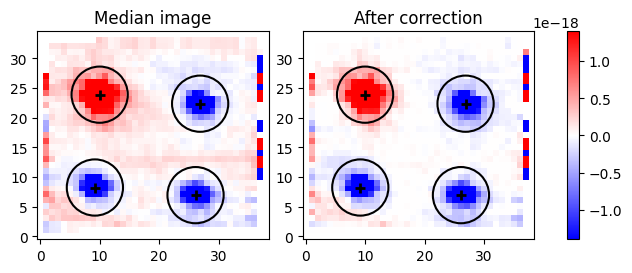

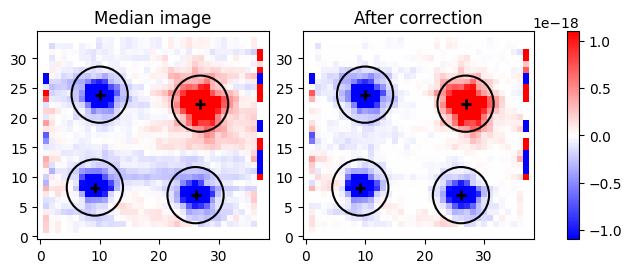

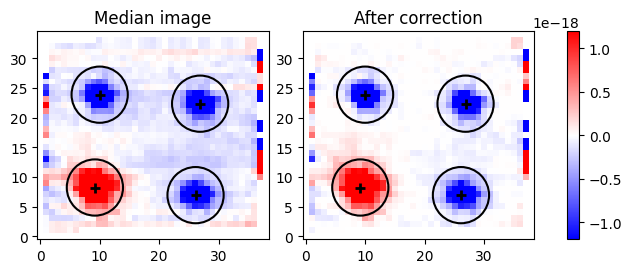

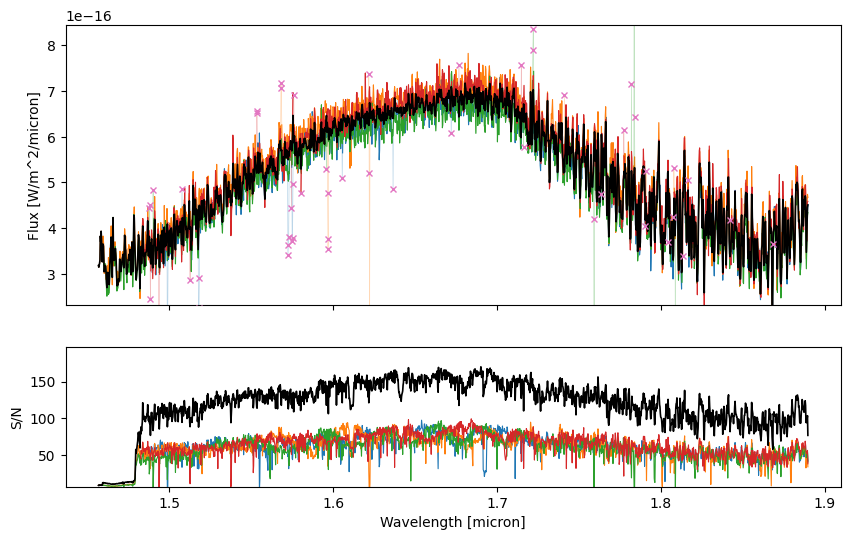

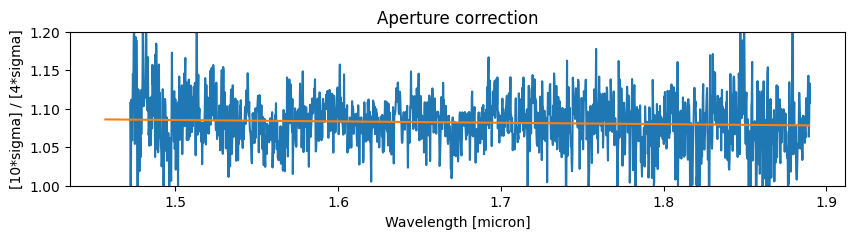

/net/schenk/data2/regt/JWST_reductions/NIRSpec_ifu_reduction_23_09_2025/VHS1256b/data//nirspec_140h_2.dat


/net/schenk/data2/regt/JWST_reductions/jwst_nirspec_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/extraction_tools.py:167: RuntimeWarning: All-NaN slice encountered
  horizontal_collapsed = np.nanmedian(masked_cube, axis=2, keepdims=True)


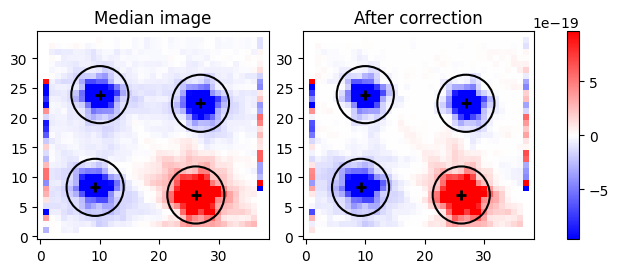

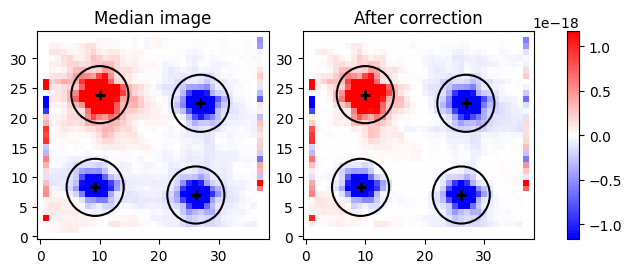

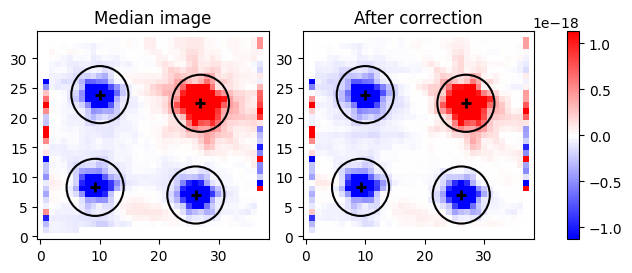

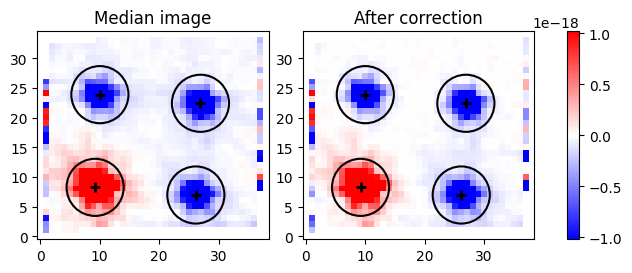

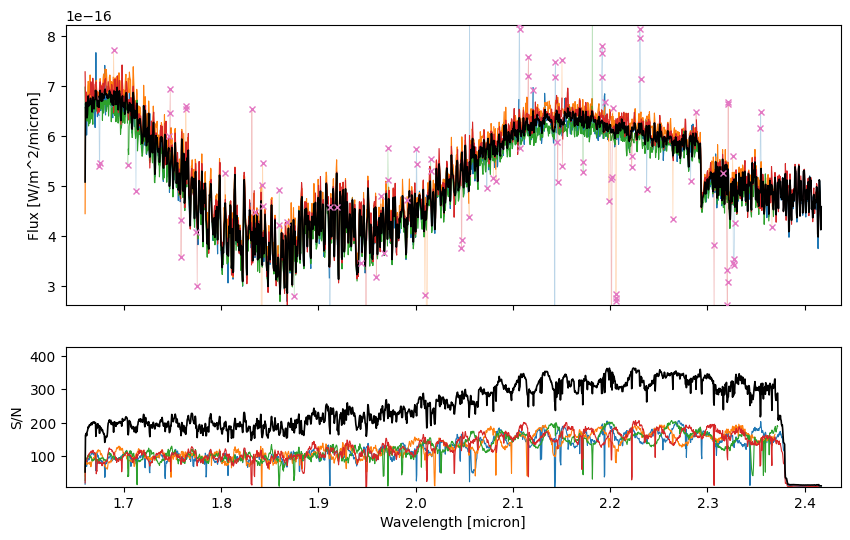

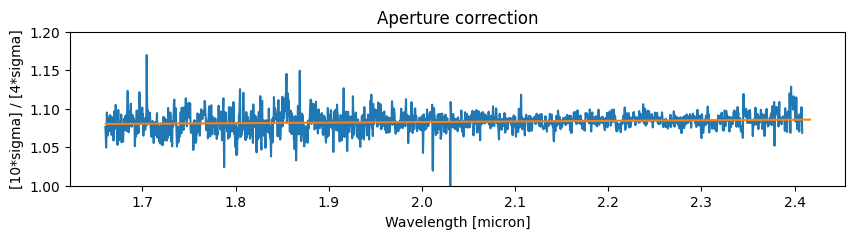

/net/schenk/data2/regt/JWST_reductions/NIRSpec_ifu_reduction_23_09_2025/VHS1256b/data//nirspec_235h_1.dat


/net/schenk/data2/regt/JWST_reductions/jwst_nirspec_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/extraction_tools.py:167: RuntimeWarning: All-NaN slice encountered
  horizontal_collapsed = np.nanmedian(masked_cube, axis=2, keepdims=True)


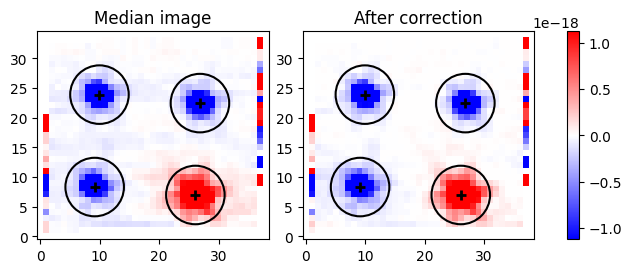

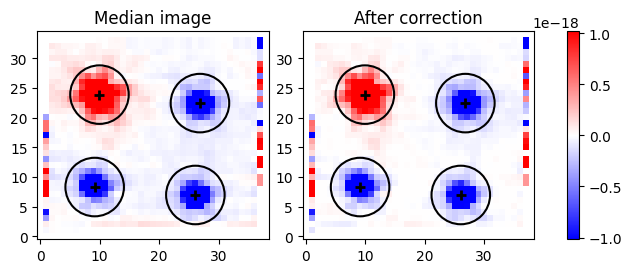

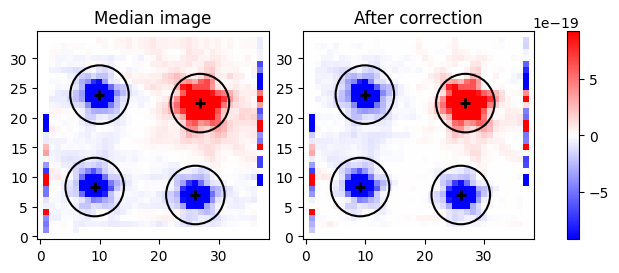

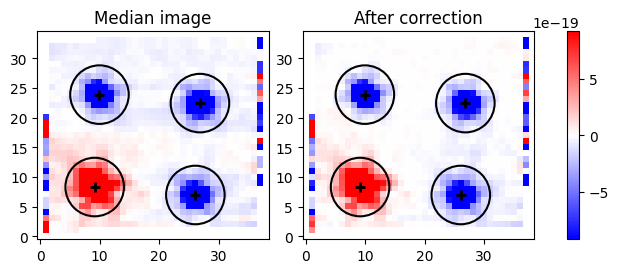

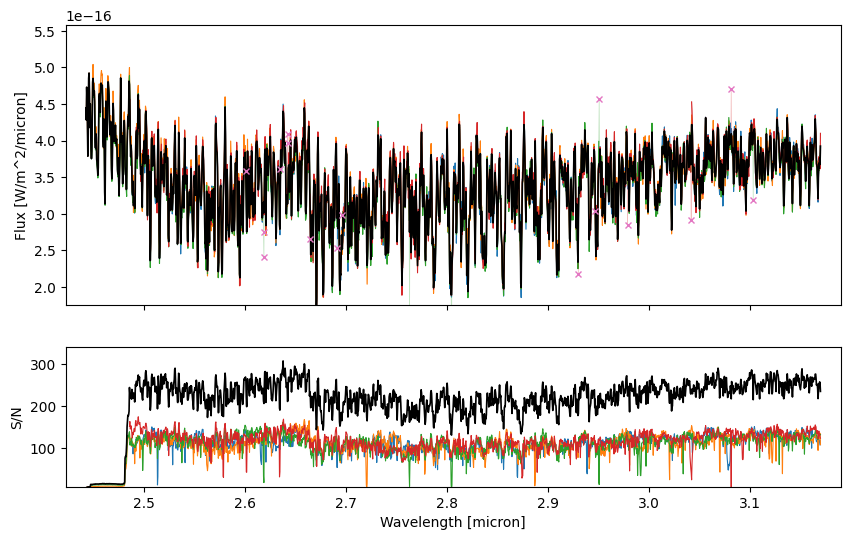

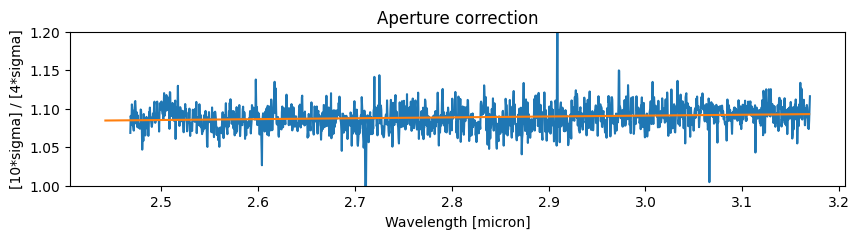

/net/schenk/data2/regt/JWST_reductions/NIRSpec_ifu_reduction_23_09_2025/VHS1256b/data//nirspec_235h_2.dat


/net/schenk/data2/regt/JWST_reductions/jwst_nirspec_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/extraction_tools.py:167: RuntimeWarning: All-NaN slice encountered
  horizontal_collapsed = np.nanmedian(masked_cube, axis=2, keepdims=True)


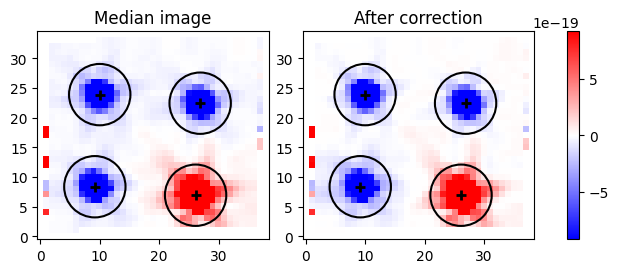

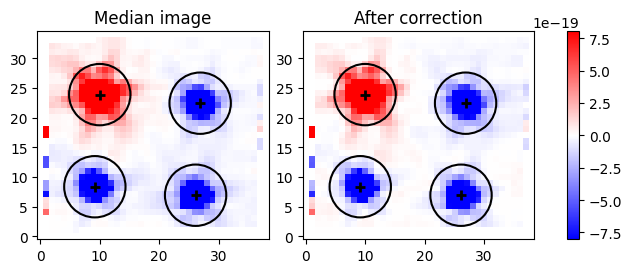

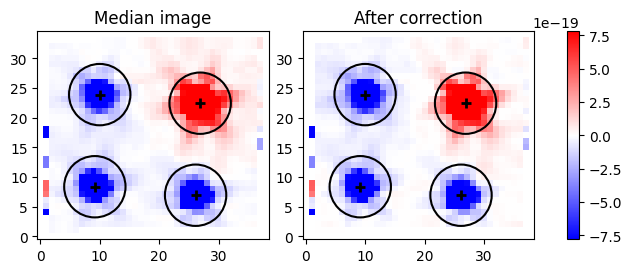

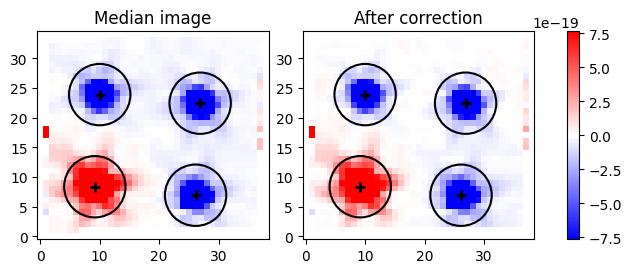

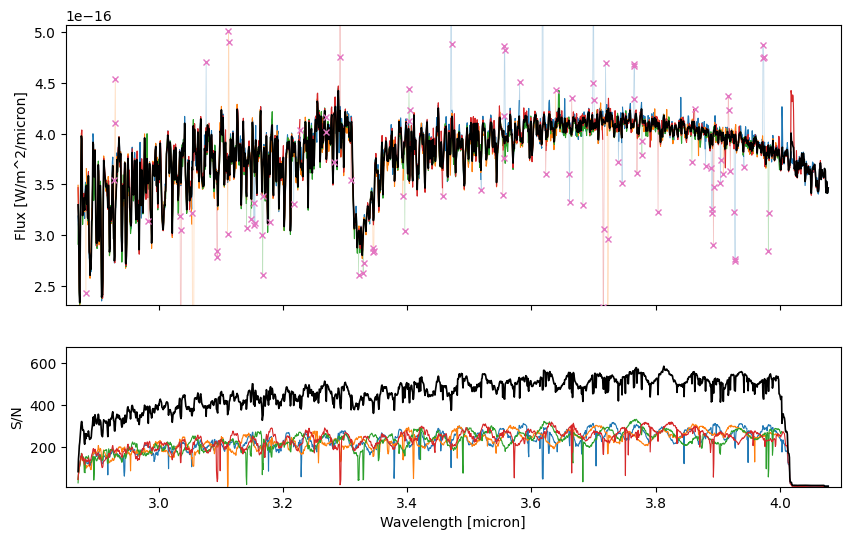

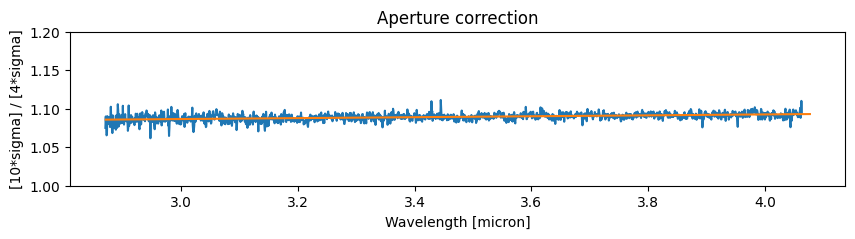

/net/schenk/data2/regt/JWST_reductions/NIRSpec_ifu_reduction_23_09_2025/VHS1256b/data//nirspec_395h_1.dat


/net/schenk/data2/regt/JWST_reductions/jwst_nirspec_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/extraction_tools.py:167: RuntimeWarning: All-NaN slice encountered
  horizontal_collapsed = np.nanmedian(masked_cube, axis=2, keepdims=True)


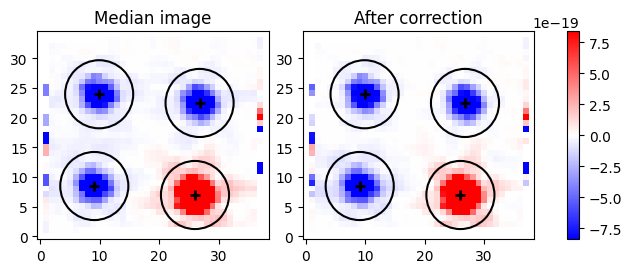

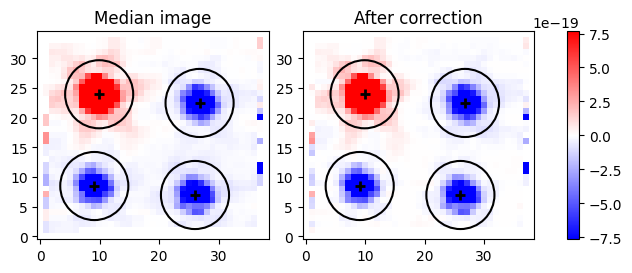

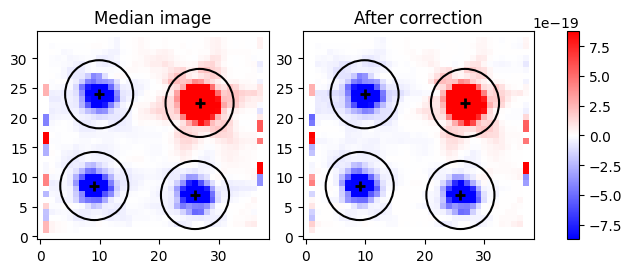

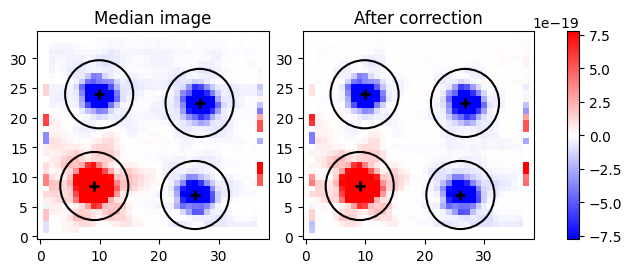

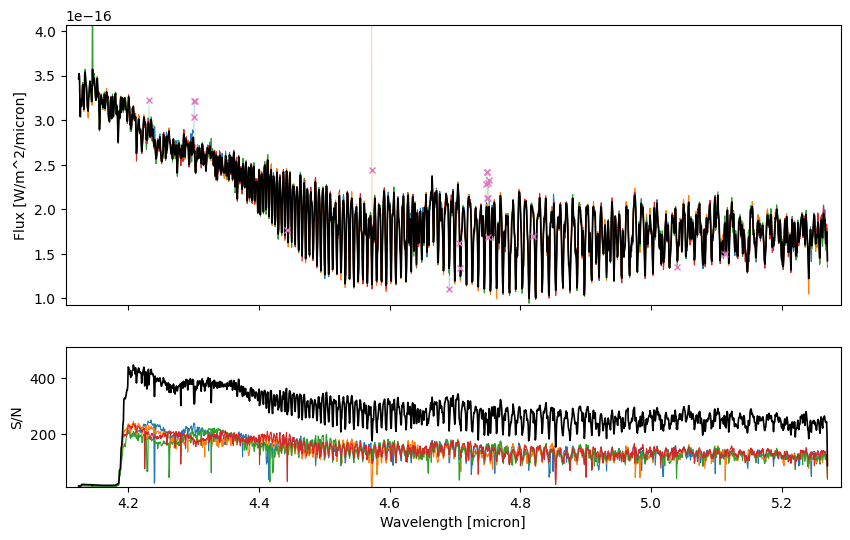

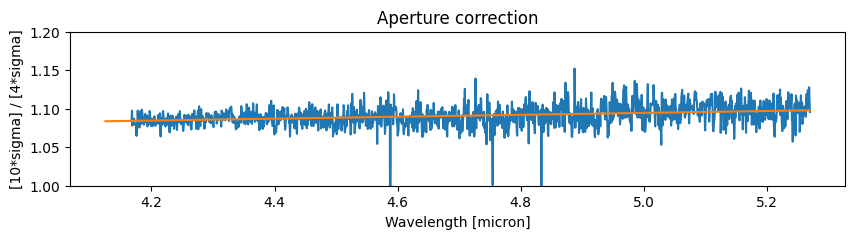

/net/schenk/data2/regt/JWST_reductions/NIRSpec_ifu_reduction_23_09_2025/VHS1256b/data//nirspec_395h_2.dat


In [2]:
grating_info = {'g140h': ('03106','f100lp',10), 'g235h':('03102','f170lp',13), 'g395h':('03104','f290lp',16)}
# grating_info = {'g235h':('03102','f170lp',13)}
for grating, (obs_id, filter, sigma_clip) in grating_info.items():

    for detector in ['nrs1', 'nrs2']:
        file_combined = f'{path}/stage3/{filter}_{grating}_{detector}_{grating}-{filter}_s3d.fits'
        files_dither = [
            f'{path}/stage2/jw01386013001_{obs_id}_{dither+1:05d}_{detector}_s3d.fits'
            for dither in range(4)
        ]

        hdu = fits.open(file_combined)
        # print(hdu['PRIMARY'].header)
        # print(grating, detector, [fits.getval(filename, keyword='TIME-OBS') for filename in files_dither])
        # continue

        SE = NIRSpecExtraction(file_combined, files_dither, grating, detector)
        SE.fit_aperture_on_combined((27,24))
        SE.fit_aperture_on_dithers((26, 7), (10, 24), (27, 23), (9, 8))
        SE.correct_dithers(plot=True)
        SE.extract_1d_dithers(radius=4)
        SE.combine_dithers(sigma_clip=sigma_clip, plot=True)#, xlim=(2.05,2.2))

        SE.aperture_correction_from_combined(radius=4, radius_tot=10, plot=True)

        print(f'{path}/nirspec_{grating[1:]}_{detector[-1:]}.dat')
        # SE.save_spectrum(f'{path}/nirspec_{grating[1:]}_{detector[-1:]}.dat')

/net/schenk/data2/regt/JWST_reductions/jwst_nirspec_env/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


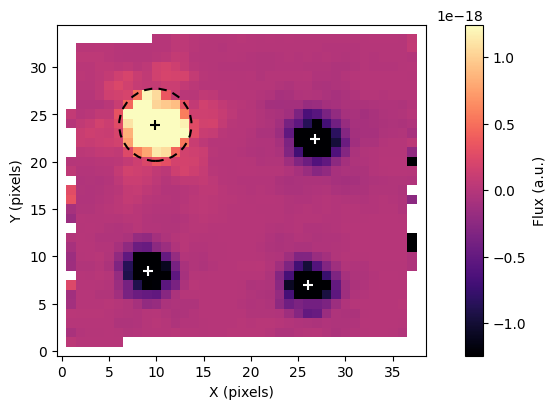

In [177]:
from matplotlib.patches import Ellipse
# radius_inflation = 4

idx = 1

median_image = np.nanmedian(SE.data_dither[idx]['cube_corrected'], axis=0)
vmax = np.nanpercentile(median_image, 98)
vmin = -vmax
fig, (ax, ax_c) = plt.subplots(figsize=(5.5,4.3), ncols=2, gridspec_kw={'width_ratios':[1,0.05]})
im = ax.imshow(median_image, origin='lower', cmap='magma', vmin=vmin, vmax=vmax, interpolation='none')
plt.colorbar(im, cax=ax_c, label='Flux (a.u.)')
ax.set(xlabel='X (pixels)', ylabel='Y (pixels)')

for j, xy_j in enumerate(SE.xy_dithers):
    if j == idx:
        c = 'k'; radius_inflation = 4
    else:
        c = 'w'; radius_inflation = 0
    ellipse = Ellipse(
        xy=xy_j, width=2*SE.sigma*radius_inflation, height=2*SE.sigma*radius_inflation, angle=0., 
        edgecolor=c, facecolor='none', lw=1.5, ls=(0,(4,3))
        )
    ax.add_patch(ellipse)
    ax.scatter(*xy_j, marker='+', color=c, s=50)

plt.savefig('/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/figures/plots/extraction_aperture_{}_{}_{}.png'.format(SE.grating, SE.detector, idx), bbox_inches='tight', dpi=300)
plt.show()

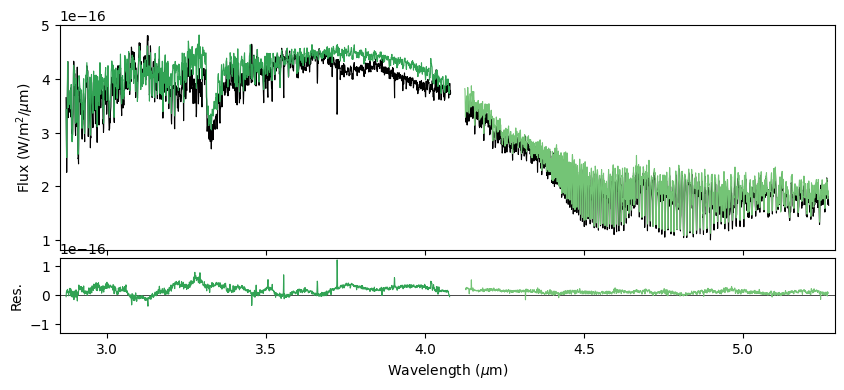

In [102]:
# gratings = ['g140h', 'g235h', 'g395h']; xlim_pad = 0.05
# gratings = ['g140h']; xlim_pad = 0.02
# gratings = ['g235h']; xlim_pad = 0.02
gratings = ['g395h']; xlim_pad = 0.02

cmap = plt.get_cmap('tab20c')
colors = {
    'g140h_nrs1': cmap(0),
    'g140h_nrs2': cmap(1),
    'g235h_nrs1': cmap(4),
    'g235h_nrs2': cmap(5),
    'g395h_nrs1': cmap(8),
    'g395h_nrs2': cmap(9),
}

path_new = path.replace('data/','')
path_ERS = '/net/schenk/data2/regt/JWST_reductions/Miles_ea_2023/ERS_reduction/'

fig, ax = plt.subplots(figsize=(10,4), nrows=2, sharex=True, gridspec_kw={'height_ratios':[3,1], 'hspace':0.05})

xlim = None
for grating in gratings:
    for detector in ['nrs1', 'nrs2']:

        filename = f'nirspec_{grating[1:]}_{detector[-1:]}.dat'
        wave, flux, err = np.loadtxt(f'{path_new}/{filename}', delimiter=',').T
        wave_ERS, flux_ERS, err_ERS = np.loadtxt(f'{path_ERS}/{filename}', delimiter=',').T

        ax[0].plot(wave_ERS, flux_ERS, c='k', lw=0.8)
        ax[0].plot(wave, flux, c=colors[f'{grating}_{detector}'], lw=0.8)#, alpha=0.9)

        ax[1].plot(wave, (flux - np.interp(wave, wave_ERS, flux_ERS)), c=colors[f'{grating}_{detector}'], lw=0.8)

        if xlim is None:
            xlim = (min(wave)-xlim_pad, max(wave)+xlim_pad)
        else:
            xlim = (min(xlim[0], min(wave)-xlim_pad), max(xlim[1], max(wave)+xlim_pad))

# xlim = (1.65,1.9)
# xlim = (2.85,3.2)
ax[0].set(xlim=xlim, ylabel='Flux (W/m$^2$/$\mu$m)')

ylim = ax[1].get_ylim()
ylim = (-max(abs(ylim[0]), abs(ylim[1])), max(abs(ylim[0]), abs(ylim[1])))

if len(gratings) == 3:
    ylim = (-2.0533447699098928e-16, 2.0533447699098928e-16)
    ax[0].annotate('ERS (Miles et al. 2023)', xy=(3.5,5e-16), fontsize=12, color='k', fontweight='bold')
    ax[0].annotate('New reduction', xy=(1.9,7.5e-16), fontsize=12, color=colors['g235h_nrs1'], fontweight='bold')
    ax[1].annotate('New-ERS', xy=(0.03,0.05), xycoords='axes fraction', ha='left', va='bottom', fontsize=12, color='k', fontweight='bold')

ax[1].set(ylim=ylim, xlabel=r'Wavelength ($\mu$m)', ylabel='Res.')
ax[1].axhline(0, c='k', lw=0.5, zorder=-1)
plt.savefig('/net/lem/data1/regt/retrieval_base/JWST_VHS_1256B/figures/plots/'+'_'.join(gratings)+'.pdf', bbox_inches='tight')
plt.show()